MACHINE EXERCISE NO. 2 Kernel Methods

    Joshua Dela Cruz
    2023-02911



## General Resources

### Libraries

In [1]:
# Data importation and manipulation
import os 
import pandas as pd
import numpy as np

# Model creation, calculation and test
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Data visualization, exploratory and result analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Auxilliaries
from time import time

In [2]:
distribution_line_color = sns.color_palette("dark:green")[2]
train_test_color = sns.color_palette('dark:#5A9_r', n_colors=3)

In [3]:
import warnings

# Suppress 'deprecated' warnings, added in final run to clean notebook when printing into pdf
warnings.filterwarnings("ignore")

### References

     - Problem 1 data source and description: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data/data
     - Problem 2 data source and description: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
     
     - Utilized ChatGPT to incorporate the Multi-Class Classifer into the RandomSearch

## Problem 1: Palmer Penguin Species

    The Palmer dataset is a collection of data on penguin morphology and population, originally published by the British Antarctic Survey. The dataset includes measurements of several physical characteristics of penguins, including culmen length (the length of the upper beak), flipper length, body mass, and sex. It also includes information on the species of penguin and the island where each penguin was observed. The dataset is often used for exploring relationships between different aspects of penguin biology and ecology, and for predicting the species of penguins based on their physical characteristics.
    
    Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.
    - Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081
    
    Simplified data from original penguin data sets. Contains variables:
    species: penguin species (Chinstrap, Adélie, or Gentoo)
    culmen_length_mm: culmen length (mm)
    culmen_depth_mm: culmen depth (mm)
    flipper_length_mm: flipper length (mm)
    body_mass_g: body mass (g)
    island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    sex: penguin sex


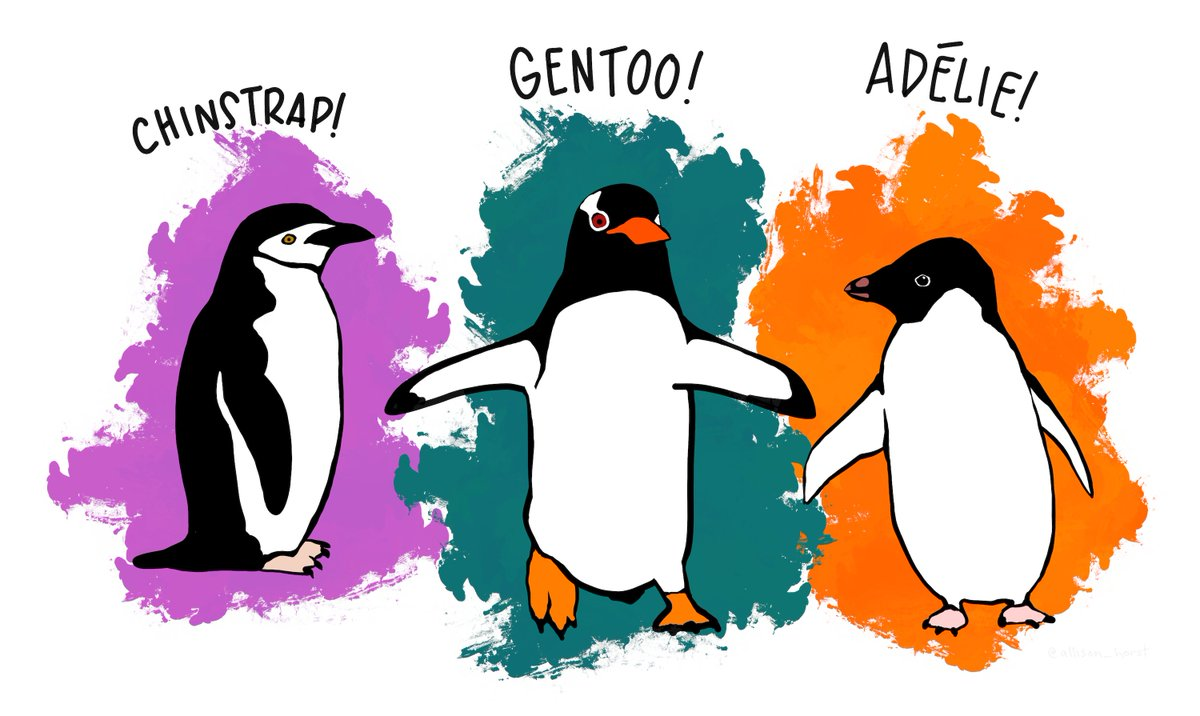

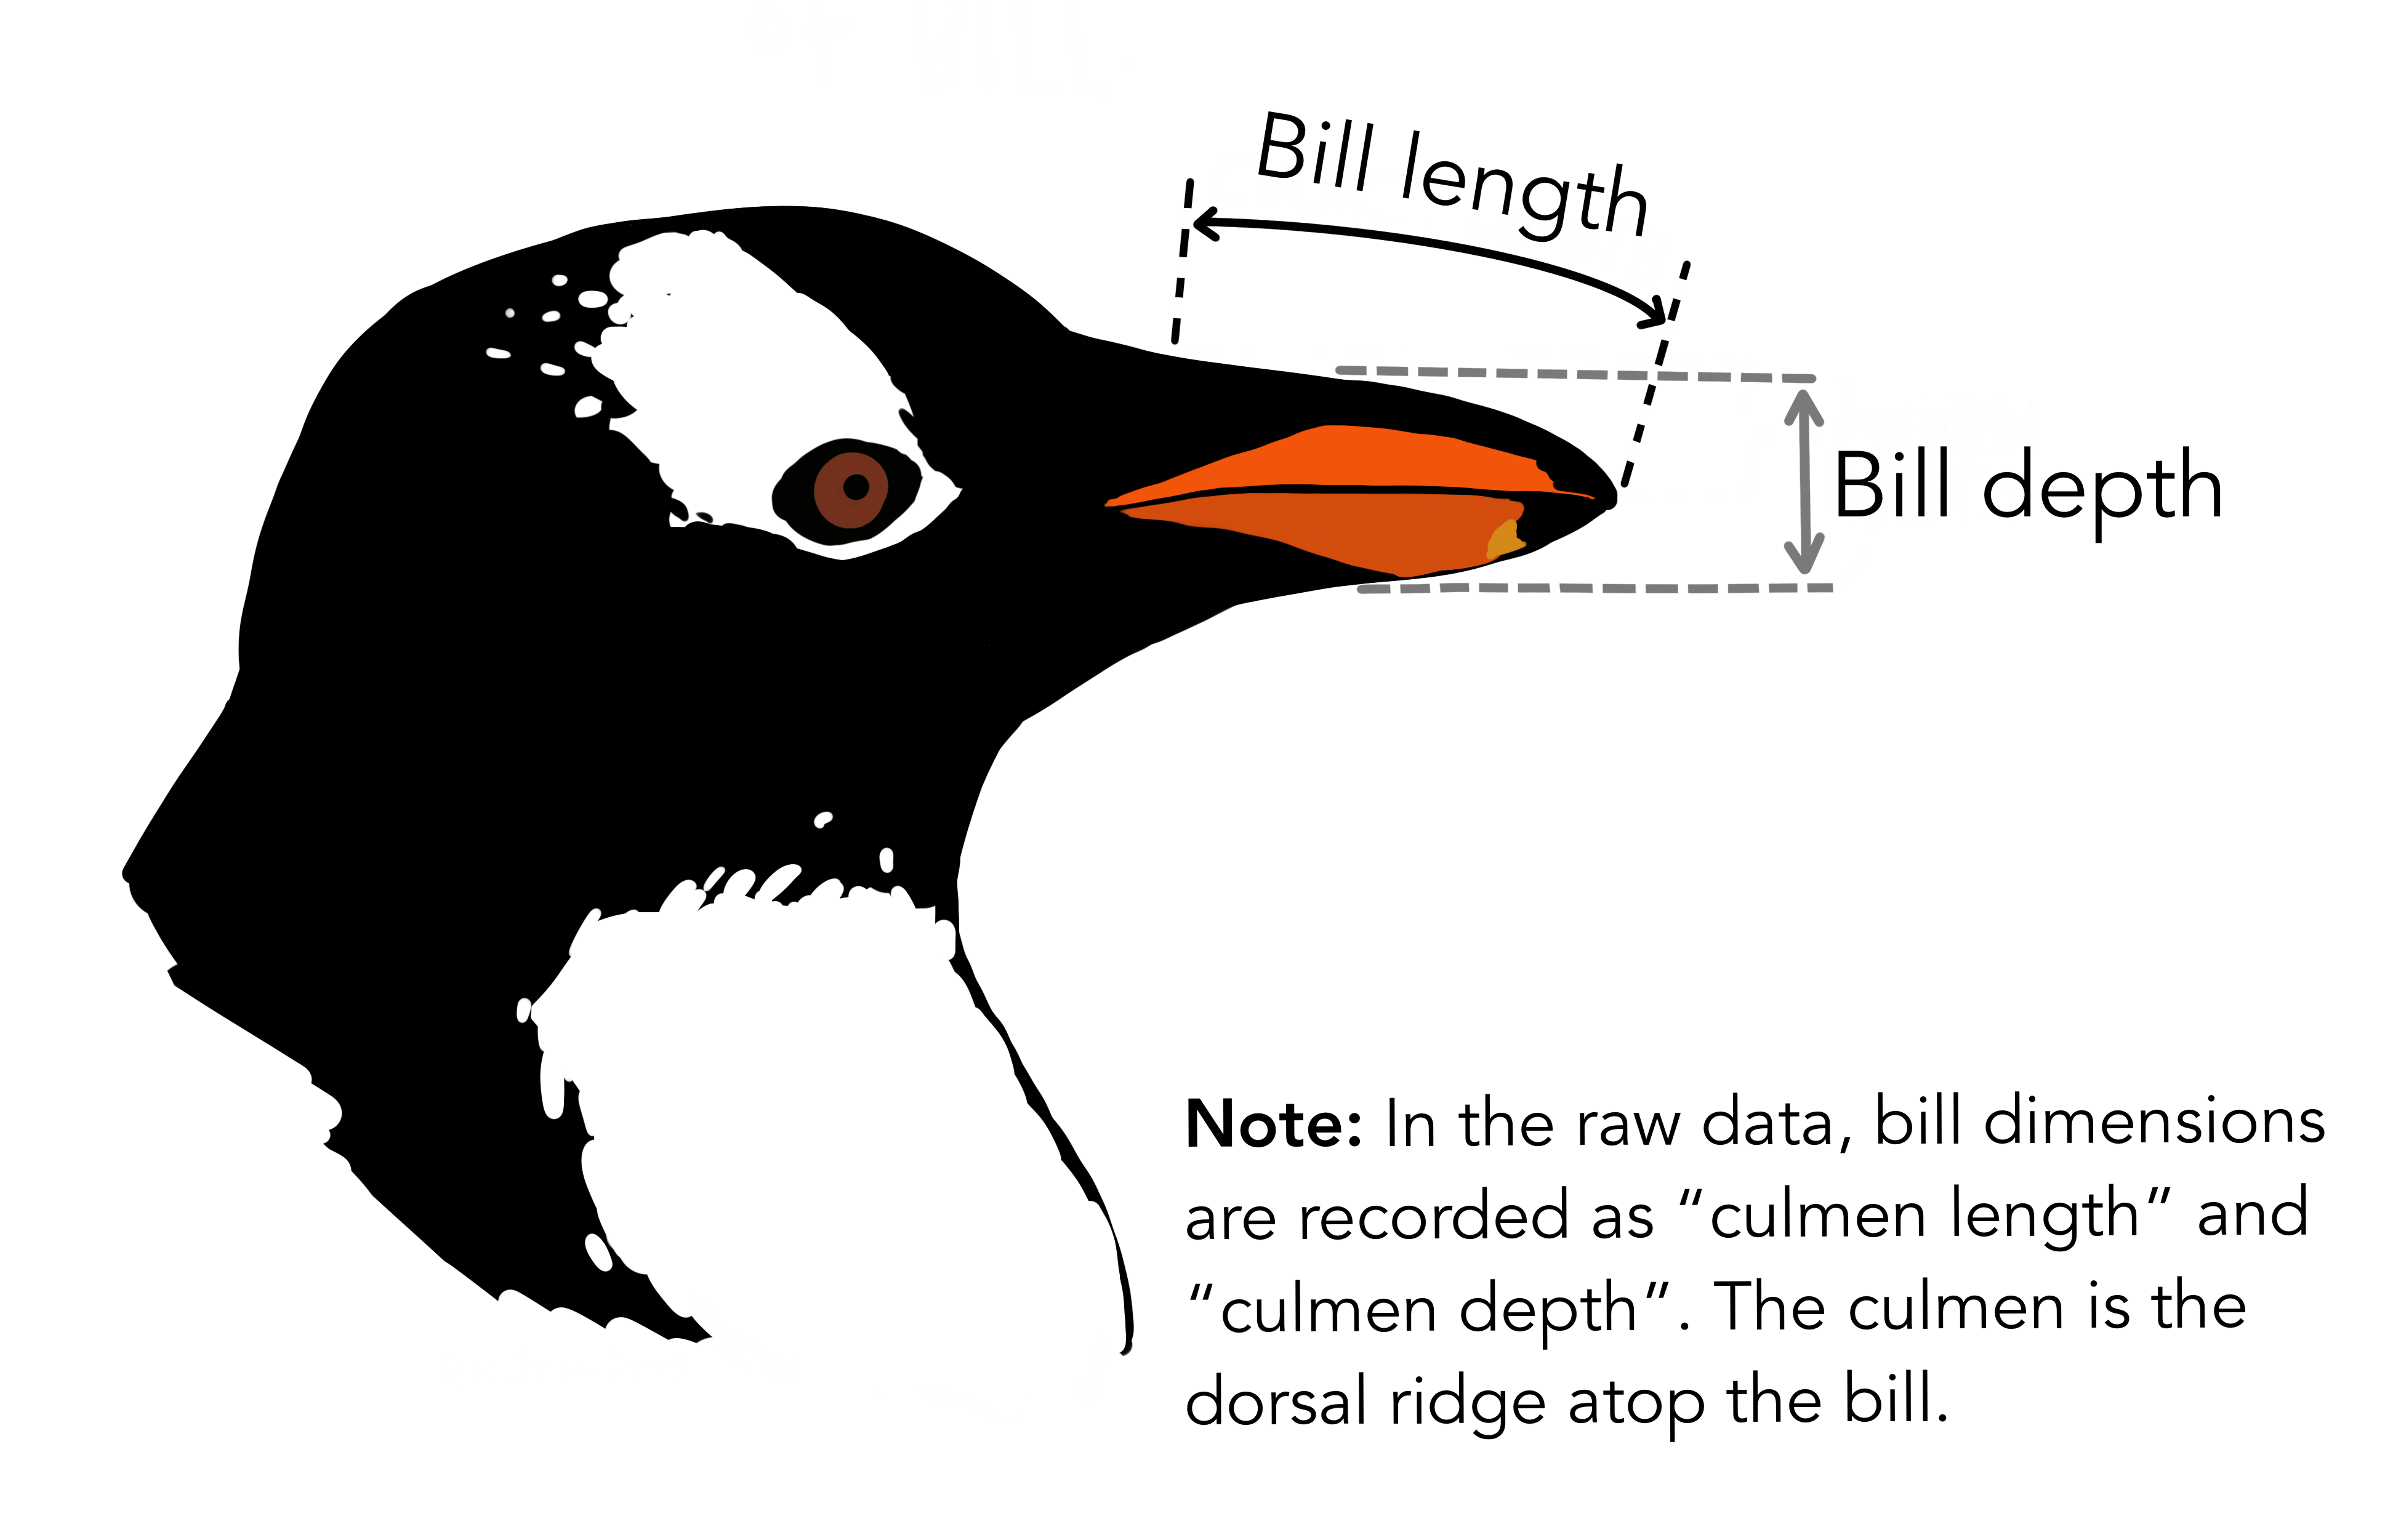

Artwork by @allison_horst

    Main Objective:
    Classify the penguins into their species (Adelie, Chinstrap, and Gentoo) based only on the culmen length and flipper length features. 

### Dataset

#### Import

In [4]:
def import_csv_dataset(file_path):
    df = pd.read_csv(file_path, header=0, encoding='latin-1')
    return df

In [5]:
penguin_data = r"C:\Users\Josh\000 Files\003 Mengg AI\01b 221 (AI)\01 Machine Exercises\02 Kernel Methods\penguins_size.csv"
penguin_data_df = import_csv_dataset(penguin_data)

In [6]:
penguin_data_df

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

#### Exploratory Analysis

In [7]:
penguin_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
penguin_data_df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
penguin_data_df.describe().T

count         mean         std     min       25%      50%  \
culmen_length_mm   342.0    43.921930    5.459584    32.1    39.225    44.45   
culmen_depth_mm    342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   

                      75%     max  
culmen_length_mm     48.5    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4750.0  6300.0

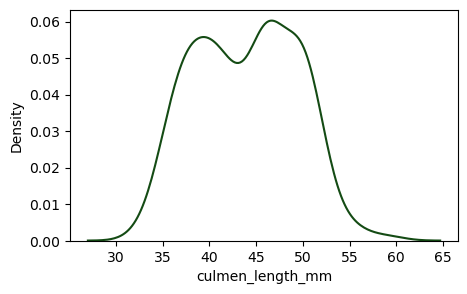

In [10]:
plt.figure(figsize=(5, 3))
sns.kdeplot(penguin_data_df['culmen_length_mm'], color=distribution_line_color)
plt.show()

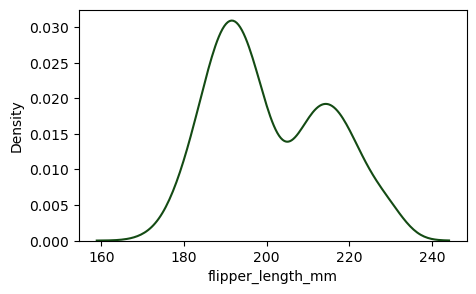

In [11]:
plt.figure(figsize=(5, 3))
sns.kdeplot(penguin_data_df['flipper_length_mm'], color=distribution_line_color)
plt.show()

#### Visualization

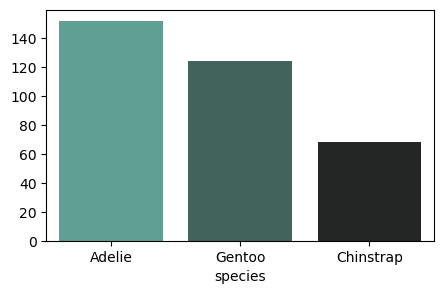

In [12]:
species = penguin_data_df['species'].value_counts()
plt.figure(figsize=(5, 3))
sns.barplot(x=species.index, y=species.values, palette='dark:#5A9_r')
plt.show()

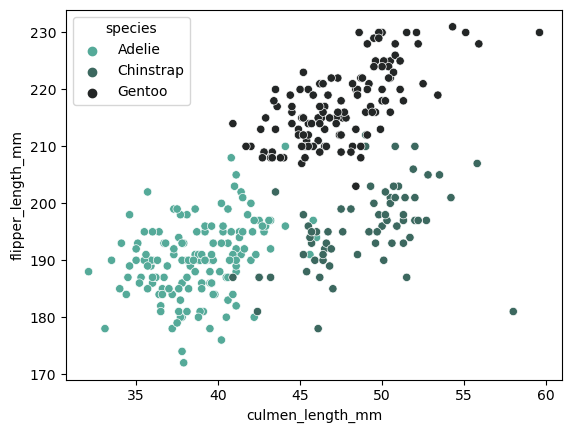

In [13]:
sns.scatterplot(x='culmen_length_mm', y='flipper_length_mm',
                data=penguin_data_df, hue='species', palette='dark:#5A9_r')
plt.show()

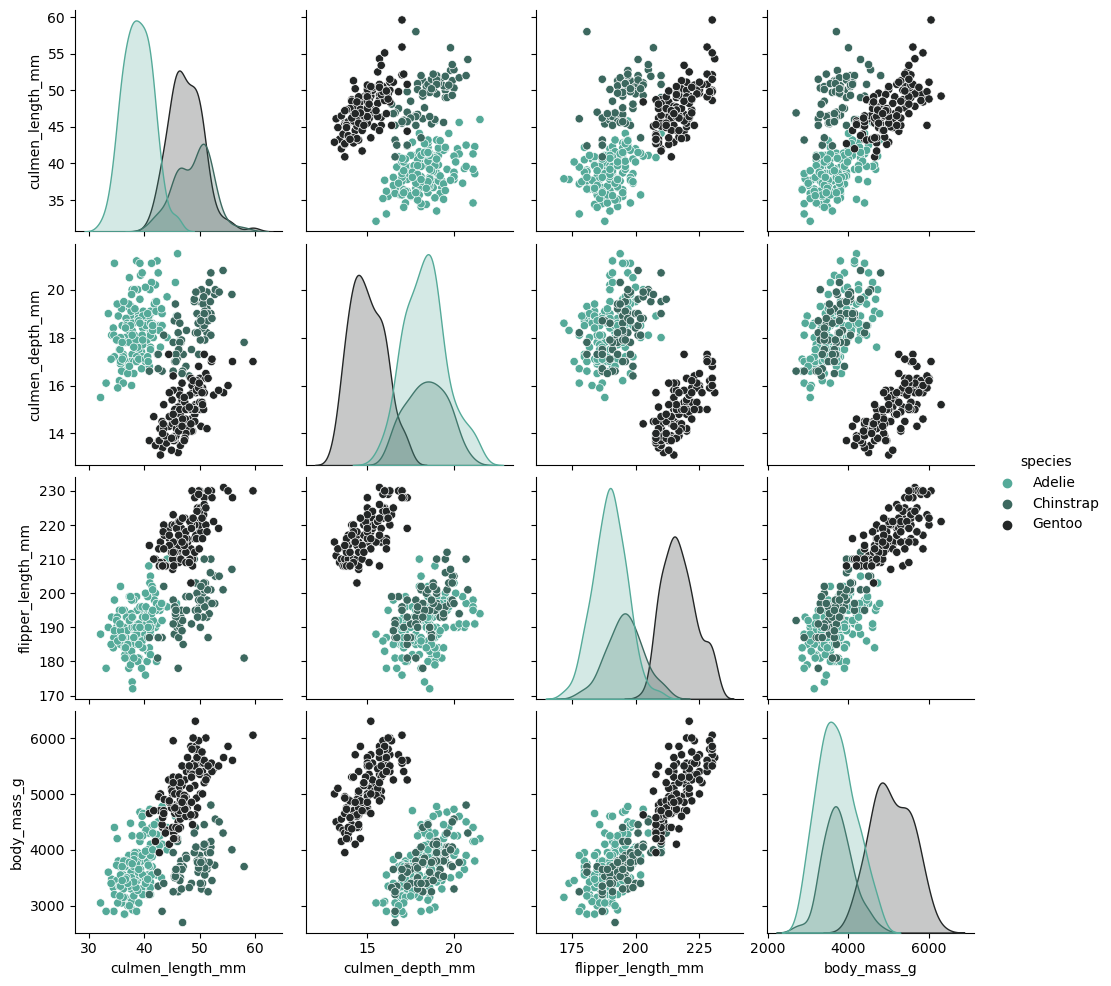

In [14]:
sns.pairplot(penguin_data_df, hue='species', palette='dark:#5A9_r')
plt.show()

EDA INSIGHTS
1. The four main features—culmen length, culmen depth, flipper length, and body mass—have some missing data.
2. Distribution plots show a semi-normal distribution with two peaks for flipper and culmen length.
3. The scatter plot of culmen and flipper length only shows minimal overlap between the different species, highlighting their great separability with just these two features.
4. The pair plot confirms the very high correlation of body mass with flipper length, as almost all species' data lie along the 45-degree line. This is also nearly true for body mass and culmen length, except for the Chinstrap species. This is quite intuitive considering that a longer culmen and/or flipper indicate a larger penguin, which means more weight (body mass).

#### Preparation

##### Removal or Imputation 

In [15]:
# (a) Test 1 - Drop data with missing values 
penguin_data_df.dropna(inplace=True)

In [ ]:
# (b) Test 2 - Fill missing values with mean
penguin_data_df[['culmen_length_mm']] = penguin_data_df[['culmen_length_mm']].fillna(penguin_data_df[['culmen_length_mm']].mean())
penguin_data_df[['flipper_length_mm']] = penguin_data_df[['flipper_length_mm']].fillna(penguin_data_df[['flipper_length_mm']].mean())

# Just to complete the data
penguin_data_df[['culmen_depth_mm']] = penguin_data_df[['culmen_depth_mm']].fillna(penguin_data_df[['culmen_depth_mm']].mean())
penguin_data_df[['body_mass_g']] = penguin_data_df[['body_mass_g']].fillna(penguin_data_df[['body_mass_g']].mean())

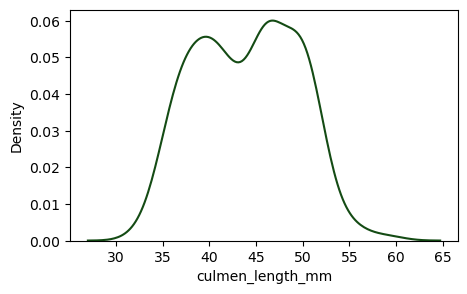

In [16]:
plt.figure(figsize=(5, 3))
sns.kdeplot(penguin_data_df['culmen_length_mm'], color=distribution_line_color)
plt.show()

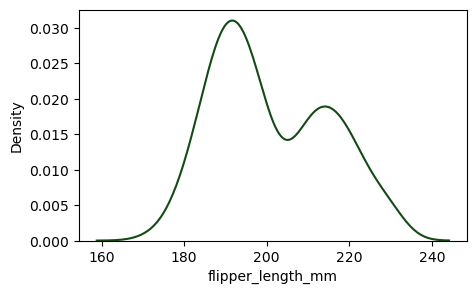

In [17]:
plt.figure(figsize=(5, 3))
sns.kdeplot(penguin_data_df['flipper_length_mm'], color=distribution_line_color)
plt.show()

    Sidenote:
    Even with the removal of the null data, the distribution curve of the features remained the same!

In [18]:
penguin_data_df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

##### Label Setup

In [19]:
species_list = list(set(penguin_data_df['species'].tolist()))
species_list

['Adelie', 'Gentoo', 'Chinstrap']

In [20]:
label_encoder = LabelEncoder()
penguin_data_df['species'] = label_encoder.fit_transform(penguin_data_df['species'])

In [21]:
label_encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [22]:
class_mapping = {class_number: class_name for class_number, class_name in enumerate(label_encoder.classes_)}
class_mapping

{0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

##### Obtain Features and Target

In [23]:
# Extract the attributes and the targets from the dataframe
x = penguin_data_df.iloc[:, [2, 4]].to_numpy()
y = penguin_data_df.iloc[:,0].to_numpy()

In [24]:
print(x.shape)
print(y.shape)

(334, 2)
(334,)


    Split samples into 75% training and 25% test data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=9811, stratify=y)

### (b) Default SVC

#### Fit Training

In [26]:
from sklearn.linear_model import Ridge

In [27]:
default_model = make_pipeline(StandardScaler(), SVC()).fit(x_train, y_train)

In [28]:
def create_confusion_matrix_and_report(model, x, y):
    y_prediction = model.predict(x)
    conf_matrix = confusion_matrix(y, y_prediction)

    conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = class_mapping.values())
    conf_matrix_display.plot(cmap='Greens')

    plt.title('Confusion Matrix')
    plt.show()

    report = classification_report(y, y_prediction, target_names=class_mapping.values())
    print(report)

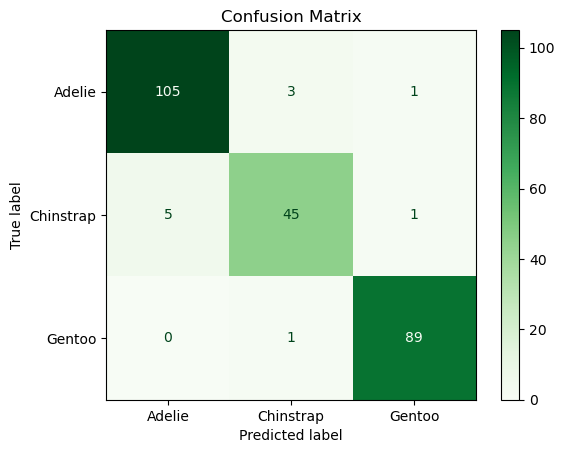

              precision    recall  f1-score   support

      Adelie       0.95      0.96      0.96       109
   Chinstrap       0.92      0.88      0.90        51
      Gentoo       0.98      0.99      0.98        90

    accuracy                           0.96       250
   macro avg       0.95      0.94      0.95       250
weighted avg       0.96      0.96      0.96       250



In [29]:
create_confusion_matrix_and_report(default_model, x_train, y_train)

#### Testing

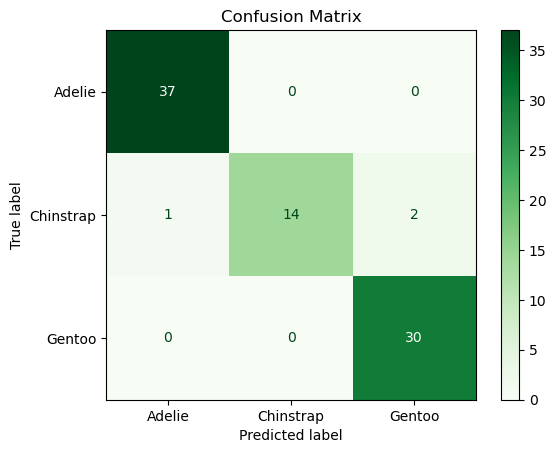

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        37
   Chinstrap       1.00      0.82      0.90        17
      Gentoo       0.94      1.00      0.97        30

    accuracy                           0.96        84
   macro avg       0.97      0.94      0.95        84
weighted avg       0.97      0.96      0.96        84



In [30]:
create_confusion_matrix_and_report(default_model, x_test, y_test)

### (c) Initial Decision Boundary

In [31]:
def plot_decision_boundary(model, x_train, y_train, x_test, y_test, target_names):
    
    DecisionBoundaryDisplay.from_estimator(model, x, cmap='Dark2_r', alpha=0.6, eps=0.5)


    for color, i, target_name in zip(train_test_color, [0, 1, 2], class_mapping.values()):
        plt.scatter(x_train[y_train == i, 0], x_train[y_train == i, 1], 
                    color=color, alpha=0.8, lw=2, label=f"{target_name} - train")
        plt.scatter(x_test[y_test == i, 0], x_test[y_test == i, 1], 
                    color=color, alpha=0.8, lw=2, label=f"{target_name} - test", marker='x')

    plt.legend(loc="best", shadow=False)
    plt.title("Train-Test Scatter Plot of Data")
    plt.show()

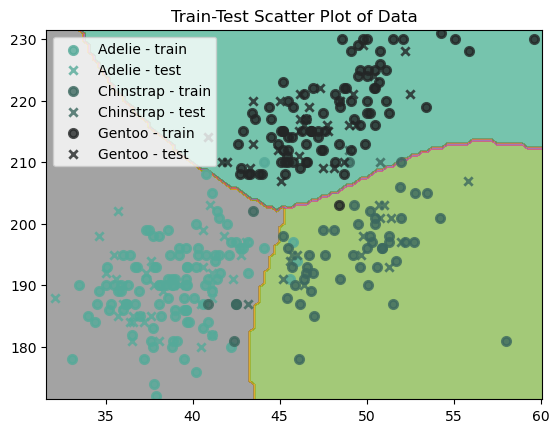

In [32]:
plot_decision_boundary(default_model, x_train, y_train, x_test, y_test, class_mapping.values())

### (d) Model Optimization

In [33]:
best_model = None
best_accuracy = -float('inf')

In [34]:
def model_optimization (classifier, classifier_name, x, y, x_test, y_test, max_iter):
    
    # Parameter Distribution
    param_dist = {
    f'{classifier_name}__estimator__C': stats.expon(scale=100),
    f'{classifier_name}__estimator__gamma': stats.expon(scale=.1),
    f'{classifier_name}__estimator__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
    }

    # Model Pipeline
    if classifier == OutputCodeClassifier:
        model = make_pipeline(StandardScaler(), classifier(SVC(), code_size=3))
    else:
        model = make_pipeline(StandardScaler(), classifier(SVC()))
    
    # Perform Random Search
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=max_iter, verbose=0)
    start = time()
    random_search.fit(x, y)
    print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
            % ((time() - start), max_iter))
    
    # Best Parameter
    print('Best Parameters:\n', random_search.best_params_)
    
    # Search Result
    predictions = random_search.best_estimator_.predict(x_test)
    print(classification_report(y_test, predictions))
    
    return random_search.best_estimator_, accuracy_score(y_test, predictions) 

#### OneVsOne SVC Classifier

In [35]:
ovo_model, ovo_accuracy = model_optimization (OneVsOneClassifier, 'onevsoneclassifier', x_train, y_train, x_test, y_test, 5)

RandomizedSearchCV took 0.23 seconds for 5 candidates parameter settings.
Best Parameters:
 {'onevsoneclassifier__estimator__C': 49.904250679057846, 'onevsoneclassifier__estimator__gamma': 0.032464040558188065, 'onevsoneclassifier__estimator__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.82      0.90        17
           2       0.94      1.00      0.97        30

    accuracy                           0.96        84
   macro avg       0.97      0.94      0.95        84
weighted avg       0.97      0.96      0.96        84



In [36]:
if ovo_accuracy > best_accuracy:
    best_accuracy = ovo_accuracy
    best_model = ovo_model

#### OneVsRest SVC Classifier

In [37]:
ovr_model, ovr_accuracy = model_optimization (OneVsRestClassifier, 'onevsrestclassifier', x_train, y_train, x_test, y_test, 5)

RandomizedSearchCV took 0.25 seconds for 5 candidates parameter settings.
Best Parameters:
 {'onevsrestclassifier__estimator__C': 42.58093600558145, 'onevsrestclassifier__estimator__gamma': 0.03179173682450218, 'onevsrestclassifier__estimator__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.82      0.90        17
           2       0.94      1.00      0.97        30

    accuracy                           0.96        84
   macro avg       0.97      0.94      0.95        84
weighted avg       0.97      0.96      0.96        84



In [38]:
if ovr_accuracy > best_accuracy:
    best_accuracy = ovr_accuracy
    best_model = ovr_model

#### ECOC SVC Classifier

In [39]:
ecoc_model, ecoc_accuracy = model_optimization (OutputCodeClassifier, 'outputcodeclassifier', x_train, y_train, x_test, y_test, 5)

RandomizedSearchCV took 0.40 seconds for 5 candidates parameter settings.
Best Parameters:
 {'outputcodeclassifier__estimator__C': 40.30628401702137, 'outputcodeclassifier__estimator__gamma': 0.012658376670812996, 'outputcodeclassifier__estimator__kernel': 'sigmoid'}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.82      0.90        17
           2       0.94      1.00      0.97        30

    accuracy                           0.96        84
   macro avg       0.97      0.94      0.95        84
weighted avg       0.97      0.96      0.96        84



In [40]:
if ecoc_accuracy > best_accuracy :
    best_accuracy = ecoc_accuracy
    best_model = ecoc_model

#### SVC Best Model

##### Print Best Model

In [41]:
print(best_model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('onevsoneclassifier',
                 OneVsOneClassifier(estimator=SVC(C=49.904250679057846,
                                                  gamma=0.032464040558188065)))])


##### Fit Training

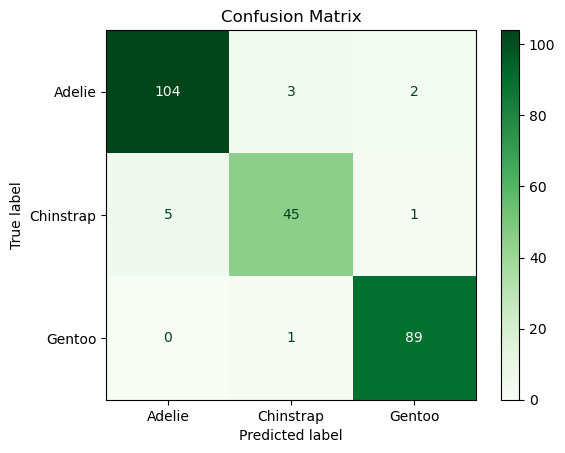

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95       109
   Chinstrap       0.92      0.88      0.90        51
      Gentoo       0.97      0.99      0.98        90

    accuracy                           0.95       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.95      0.95      0.95       250



In [42]:
create_confusion_matrix_and_report(best_model, x_train, y_train)

##### Testing

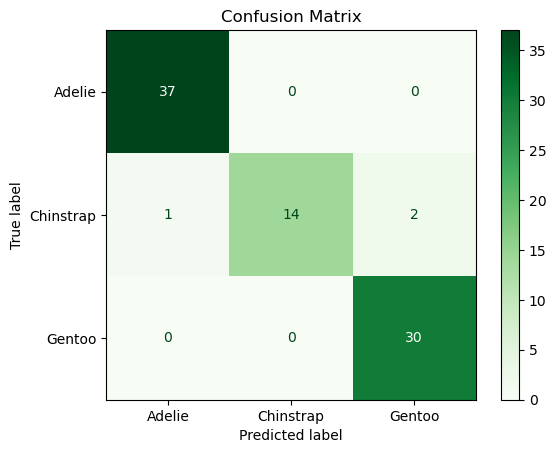

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        37
   Chinstrap       1.00      0.82      0.90        17
      Gentoo       0.94      1.00      0.97        30

    accuracy                           0.96        84
   macro avg       0.97      0.94      0.95        84
weighted avg       0.97      0.96      0.96        84



In [43]:
create_confusion_matrix_and_report(best_model, x_test, y_test)

##### Final Decision Boundary

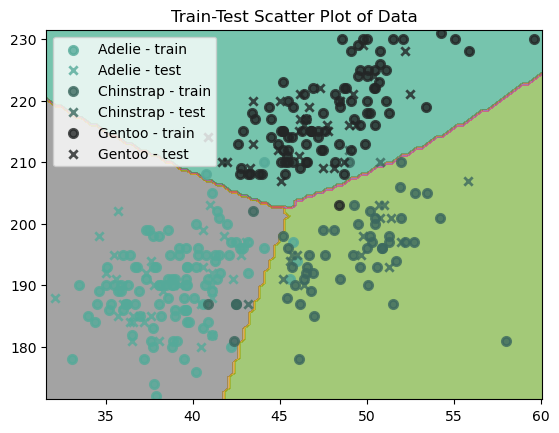

In [44]:
plot_decision_boundary(best_model, x_train, y_train, x_test, y_test, class_mapping.values())

### Insights

    1. The initial scatter plot from the exploratory data analysis (EDA) clearly showed the separability of the penguin species (Adelie, Chinstrap, and Gentoo) based on their flipper and culmen length. This was confirmed by using a simple SVC classifier with default hyperparameters, which achieved a very high macro-accuracy rate of 95% for training and 97% for testing. Moreover, considering that the cost of misclassification is equal for false positives and false negatives in this problem, the macro-F1 score which yielded a similar high result of 95% for both training and testing, further demonstrated the sensitivity and precision of the model for this problem.

    2. By employing three different multi-classification strategies and the random search algorithm with only five trials and default 5-fold validation to tune the hyperparameters of the kernel classifier, it was determined that the One-vs-Rest SVC Classifier with a box constraint of 91.50, gamma of 0.15, and radial basis function (rbf) kernel was ideal for this classification problem as this choice slightly increased the macro-accuracy rate of the test data to 98%.

## Problem 2: Predicting Bike Sharing Demand in Seoul, South Korea

    Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
    
    The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. 
       
    Citation:
    V E, Sathishkumar (2020), “Seoul Bike Sharing Demand Prediction”, Mendeley Data, V2, doi: 10.17632/zbdtzxcxvg.2
    
    Main Objective:
    Predict Bike Demand using Hour, Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, and Rainfall of data corresponding to Winter Season

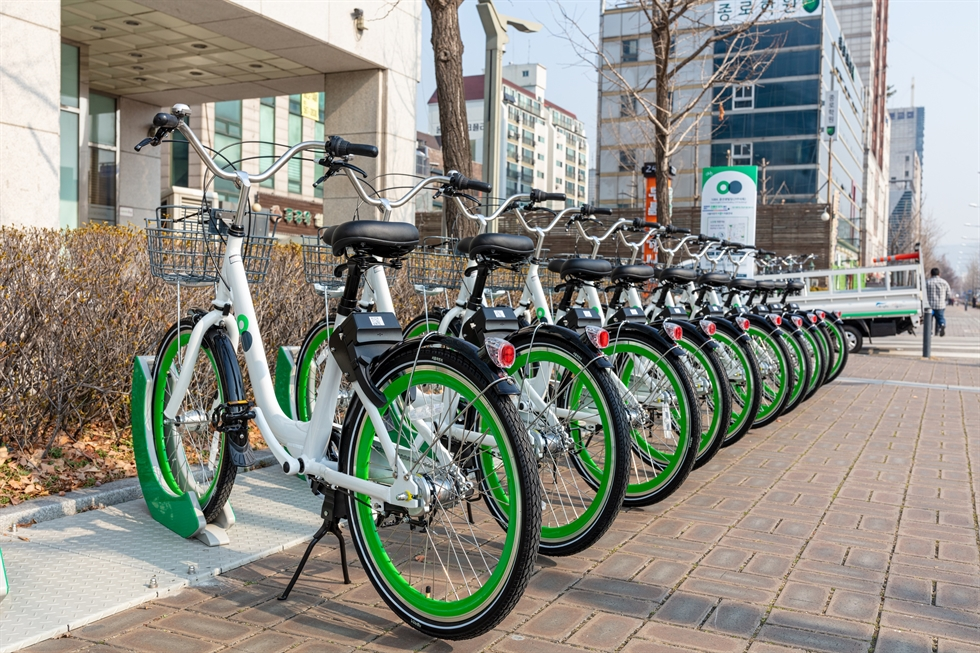

Bikes from the Seoul Metropolitan Government's bike-sharing service, Ttareungyi, are parked at a rental station in Seoul in this undated photo. Courtesy of Seoul Metropolitan Government

### Dataset

#### Import

In [45]:
seoul_bike_data = r"C:\Users\Josh\000 Files\003 Mengg AI\01b 221 (AI)\01 Machine Exercises\02 Kernel Methods\SeoulBikeData.csv"
seoul_bike_df = import_csv_dataset(seoul_bike_data)

In [46]:
# Problem specific instructions:
# Get the data points obtained during the 'Winter' Season
# Drop 'Holiday' and 'Functioning Day' columns
seoul_bike_winter_df = seoul_bike_df[seoul_bike_df['Seasons'] == 'Winter']
seoul_bike_final_df = seoul_bike_winter_df.drop(columns=['Holiday','Functioning Day','Seasons'])

In [47]:
seoul_bike_final_df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
2155  28/02/2018                 19    19              2.5           95   
2156  28/02/2018                  8    20              2.7           96   
2157  28/02/2018                 10    21              2.4           95   
2158  28/02/2018                 13    22              2.3           96   
2159  28/02/2018                 23    23              1.8           96   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
2155               1.9               838                        1.7   
2156               1.5              1479                        2.1   
2157               2.5              1349                        1.6   
2158               1.9              1207                        1.7   
2159               1.2               745                        1.2   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
0                         0.0           0.0            0.0  
1                         0.0           0.0            0.0  
2                         0.0           0.0            0.0  
3                         0.0           0.0            0.0  
4                         0.0           0.0            0.0  
...                       ...           ...            ...  
2155                      0.0           0.0            0.0  
2156                      0.0           0.0            0.0  
2157                      0.0           9.0            0.0  
2158                      0.0           0.0            0.0  
2159                      0.0           0.0            0.0  

[2160 rows x 11 columns]

#### Exploratory Analysis

In [48]:
seoul_bike_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 0 to 2159
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2160 non-null   object 
 1   Rented Bike Count          2160 non-null   int64  
 2   Hour                       2160 non-null   int64  
 3   Temperature(°C)            2160 non-null   float64
 4   Humidity(%)                2160 non-null   int64  
 5   Wind speed (m/s)           2160 non-null   float64
 6   Visibility (10m)           2160 non-null   int64  
 7   Dew point temperature(°C)  2160 non-null   float64
 8   Solar Radiation (MJ/m2)    2160 non-null   float64
 9   Rainfall(mm)               2160 non-null   float64
 10  Snowfall (cm)              2160 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 202.5+ KB


In [49]:
seoul_bike_final_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
dtype: int64

#### Preparation

In [50]:
# Obtain features data
features_df = seoul_bike_final_df.drop(columns=['Rented Bike Count', 'Date'])

In [51]:
# Obtain target data
target_df = seoul_bike_final_df['Rented Bike Count']

In [52]:
# Transform dataframe into numpy for partitioning
x2 = features_df.to_numpy()
y2 = target_df.to_numpy()

In [53]:
print(x2.shape)
print(y2.shape)

(2160, 9)
(2160,)


#### (a) Visualization

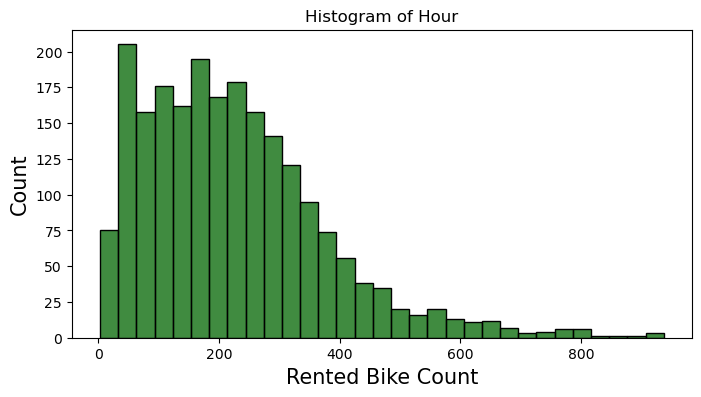

In [74]:
plt.figure(figsize=(8, 4))
sns.histplot(data=target_df, color='darkgreen')
plt.title(f"Histogram of {column}")
plt.show()

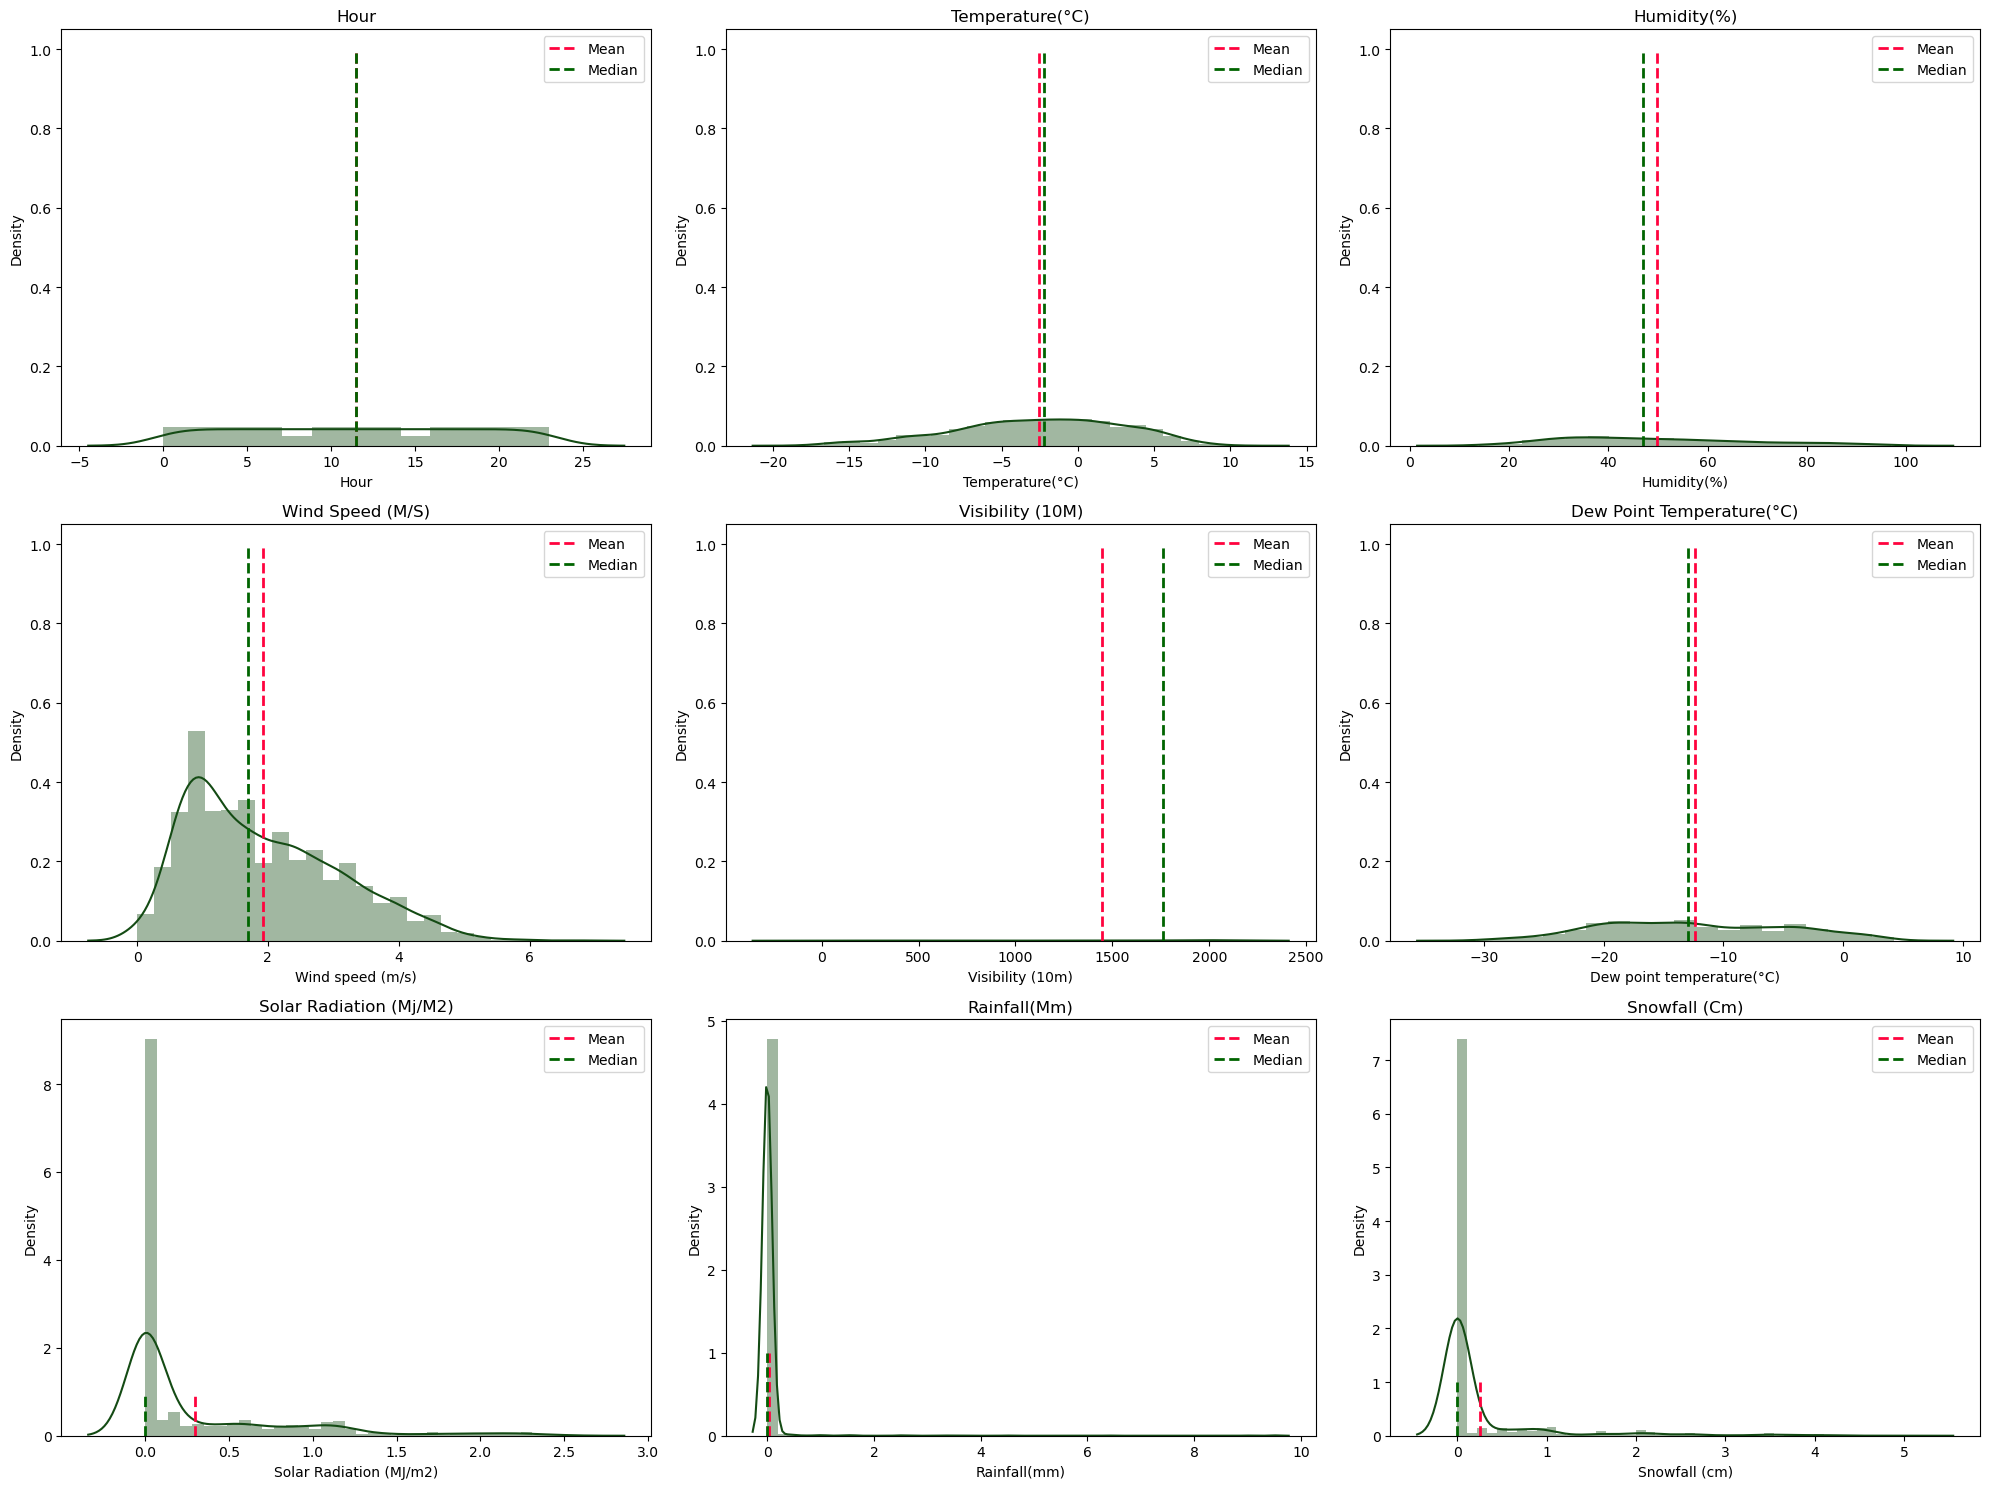

In [54]:
fig = plt.figure(figsize=(20, 15))
for index, column in enumerate(features_df.columns):
    plt.subplot(3, 3, index + 1)
    feature = features_df[column]
    sns.distplot(features_df[column], color = distribution_line_color)
    plt.plot([feature.mean(), feature.mean()], [0, 1], color='#ff033e', linestyle='dashed', linewidth=2, label='Mean')  
    plt.plot([feature.median(), feature.median()], [0, 1], color='darkgreen', linestyle='dashed', linewidth=2, label='Median') 
    plt.title(f'{column.title()}')
    plt.legend()
    plt.tight_layout()
    
plt.show()

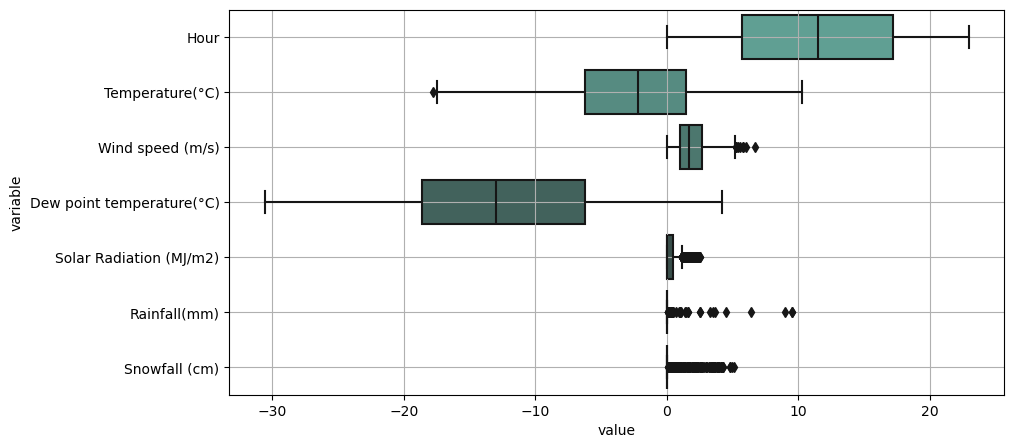

In [55]:
features_df_alpha = features_df.drop(columns=['Visibility (10m)', 'Humidity(%)'])

# Collect all features 
df_melted = features_df_alpha.melt(var_name='variable', value_name='value')

# Create a combined boxplot using Seaborn
plt.figure(figsize=(10,5))
sns.boxplot(data=df_melted, width=0.8, orient="h",x="value", y="variable", palette = 'dark:#5A9_r')
plt.rc('axes', labelsize=15)
plt.grid()
plt.show()

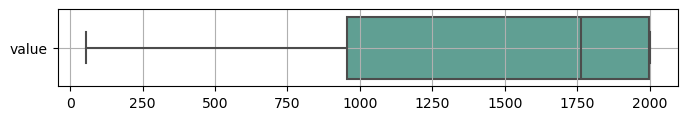

In [56]:
features_df_beta = features_df[['Visibility (10m)']]

# Collect all features 
df_melted = features_df_beta.melt(var_name='variable', value_name='value')

# Create a combined boxplot using Seaborn
plt.figure(figsize=(8,1))
sns.boxplot(data=df_melted, width=0.8, orient="h", palette = 'dark:#5A9_r')
plt.rc('axes', labelsize=15)
plt.grid()
plt.show()

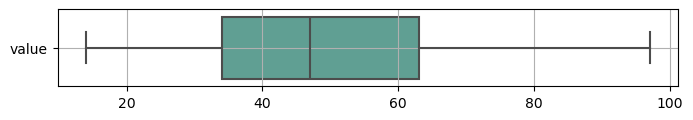

In [57]:
features_df_gamma = features_df[['Humidity(%)']]

# Collect all features 
df_melted = features_df_gamma.melt(var_name='variable', value_name='value')

# Create a combined boxplot using Seaborn
plt.figure(figsize=(8,1))
sns.boxplot(data=df_melted, width=0.8, orient="h", palette = 'dark:#5A9_r')
plt.rc('axes', labelsize=15)
plt.grid()
plt.show()

    EDA INSIGHTS:
    1. Dataset is complete; no null values.
    2. Hour, Temperature and Dew Point Temperature have a normal distribution which mean equal mean, median and mode
    -  Humidity(%), Wind Speed(m/s), Solar Radiation(MJ/m2),Rainfall(mm),Snowfall(cm) are right skewed which mean mode < median < mean.
    -  Visibility (10m) is left skewed which means mean < median < mode
    3. During winter, there were a lot of unexpected heavvy rainfall (outliers in the box plot).

#### Partition

In [58]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=9811)

### (b) Support Vector Regression Model

In [59]:
def regression_model_optimization (classifier, classifier_name, parameter1, parameter1_scale, max_iter, x, y, x_test, y_test):
    # Parameter Distribution
    param_dist = {
        f'{classifier_name}__{parameter1}': stats.expon(scale=parameter1_scale),
        f'{classifier_name}__gamma': stats.expon(scale=1),
        f'{classifier_name}__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
        }

    # Model Pipeline
    model = make_pipeline(StandardScaler(), classifier())

    # Perform Random Search
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=max_iter, verbose=0)
    start = time()
    
    random_search.fit(x, y)
    print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
            % ((time() - start), max_iter))

    # Best Parameter
    print('Best Parameters:\n', random_search.best_params_)
    
    predictions = random_search.best_estimator_.predict(x_test)

    # Calculate RMSE
    rmse = mean_squared_error(y_test, predictions, squared = False)
    print(f"RMSE on Test Set: {rmse}")
    
    return random_search.best_estimator_

In [60]:
svr_model = regression_model_optimization (SVR, 'svr', 'epsilon', 0.1, 20, x2_train, y2_train, x2_test, y2_test)

RandomizedSearchCV took 57.62 seconds for 20 candidates parameter settings.
Best Parameters:
 {'svr__epsilon': 0.25300816439683743, 'svr__gamma': 0.6128502068621773, 'svr__kernel': 'linear'}
RMSE on Test Set: 135.54133614019278


In [61]:
def plot_pred_vs_actual(x_train, y_train, x_test, y_test, model, title):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    max_val = max(np.max(y_train_pred), np.max(y_test_pred))
    
    plt.plot(np.array([0, max_val]),np.array([0, max_val]),color='r',label='_nolegend_')
    plt.scatter(y_train, y_train_pred, alpha=0.25, label="Training")
    plt.scatter(y_test, y_test_pred, alpha=0.75, label="Testing")
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Plot of Training and Testing with {title}')
    plt.legend()
    plt.grid()
    plt.show()
    
    print('R-squared on Training Data: %.5f' % model.score(x_train ,y_train))
    print('R-squared on Test Data: %.5f' % model.score(x_test,y_test))

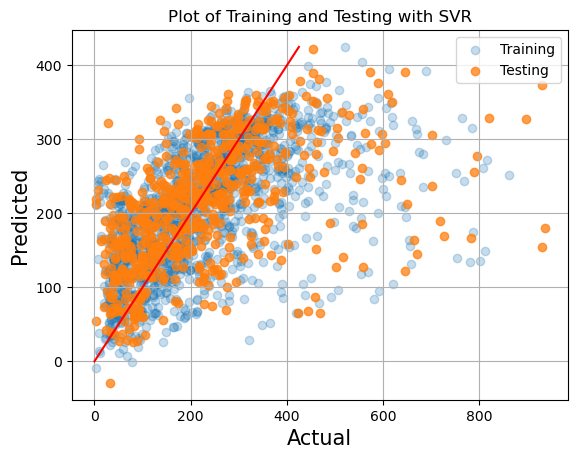

R-squared on Training Data: 0.29029
R-squared on Test Data: 0.25285


In [62]:
plot_pred_vs_actual(x2_train, y2_train, x2_test, y2_test, svr_model, 'SVR')

### (c) Kernel Ridge Regression Model

In [63]:
krr_model = regression_model_optimization (KernelRidge, 'kernelridge', 'alpha', 0.1, 20, x2_train, y2_train, x2_test, y2_test)

RandomizedSearchCV took 12.27 seconds for 20 candidates parameter settings.
Best Parameters:
 {'kernelridge__alpha': 0.020565179479146534, 'kernelridge__gamma': 0.19451644541876276, 'kernelridge__kernel': 'rbf'}
RMSE on Test Set: 106.62921653486599


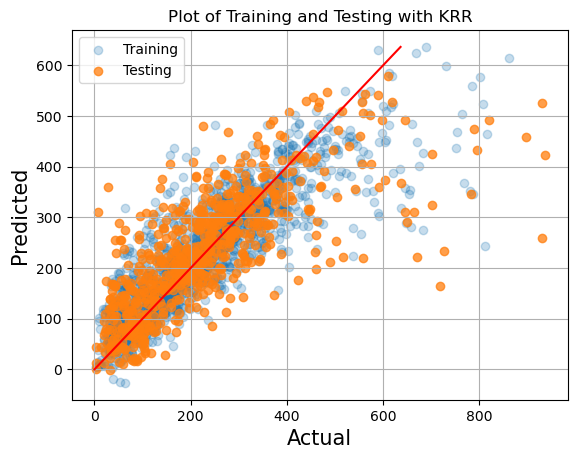

R-squared on Training Data: 0.73291
R-squared on Test Data: 0.53760


In [64]:
plot_pred_vs_actual(x2_train, y2_train, x2_test, y2_test, krr_model, 'KRR')

### (d) Linear Regression Model

In [78]:
linear_regression_model = make_pipeline(StandardScaler(),LinearRegression()).fit(x2_train,y2_train)

lrm_rmse = mean_squared_error(y2_test, linear_regression_model.predict(x2_test), squared = False)
print(f"RMSE on Test Set: {lrm_rmse}")

RMSE on Test Set: 133.04185147779296


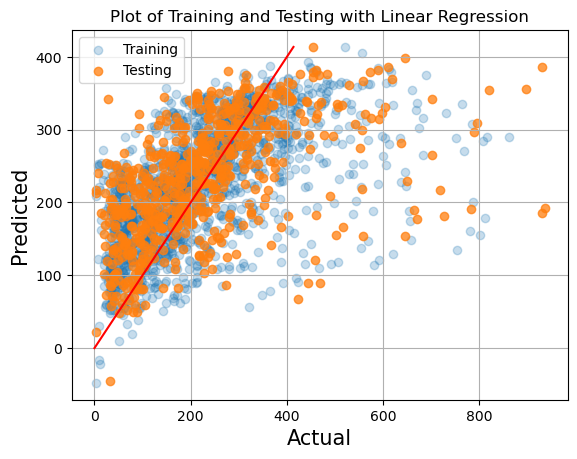

R-squared on Training Data: 0.31682
R-squared on Test Data: 0.28016


In [66]:
plot_pred_vs_actual(x2_train, y2_train, , y2_test, linear_regression_model, 'Linear Regression')

### Insights

    1. The high-dimensionality of the dataset has proven to be challenging for visualization. Although multiple distribution and box plots denote individual behaviors of selected features, the varying nature of these feature's behaviors present the feeling of the data's possible complexity.

    2. In the initial Support Vector Regression (SVR) model with tuned hyperparameters from 20 random search iterations, a root mean square error (RMSE) of 135.54 was obtained. To further interpret the results, a Predicted-Actual plot was created, showing that the model predicted values within a maximum range of 400, while some actual data points spread out up to 800. This indicates a very low regression ability, despite using a very small Kernel Gamma. The low R-squared value of 0.25 for the test data further emphasizes this point.

    3. When using two other regression models, Kernel Ridge Regression (KRR) and a basic Linear Regression (LR) model, weak results were consistently obtained. KRR yielded an RMSE of 106.63 and an R-squared value of 0.53 on the test data, while LR had an RMSE of 133.05 and an R-squared value of 0.28 on the test data.
    
    4. Based on these insights, it can be concluded that the models used lacked the ability to achieve good regression results given the high complexity of the data. Exploring other regression models or transforming the data for the appropriate regression task is recommended to potentially improve the results.